# KLASY

# ZAJECIA 1

## tworzymy klase

In [1]:
class Creature:
    p_death=0.2
    p_repr=0.2

## tworzymy obiekty

In [2]:
creature1 = Creature()
creature2 = Creature()

## czy to sa dwa rozne obiekty

In [3]:
creature1 is creature2

False

In [4]:
creature1 == creature2

False

## tworzymy dodatkowa zmienna 

In [5]:
creature3 = creature1

creature 1 i 2 to obiekty ale creature 3 to juz tylko zmienna

In [6]:
creature1 is creature3

True

In [7]:
creature1 == creature3

True

## jak sprawdzic klase obiektu

In [8]:
type(creature1)

__main__.Creature

### DYGRESJA

In [9]:
x = 2
y = 2
x is y

True

In [10]:
id(x), id(y)

(1850320906576, 1850320906576)

In [11]:
a = 12345
b = 12345
a is b

False

In [12]:
a == b

True

In [13]:
a == 12345.0

True

In [14]:
id(a), id(b)

(1850398824944, 1850398826032)

python tak dziala ze lizny do 256 sa traktowane jako ten sam obiekt, poznie juz nie XDD

### koniec dygresji

In [15]:
id(creature1), id(creature2), id(creature3)

(1850398917776, 1850398917488, 1850398917776)

## atrybuty klasy

In [16]:
creature1.p_death, creature1.p_repr

(0.2, 0.2)

sa to atrybuty statyczne (bo stala wartosc) ktore mozemy nadpisywac

In [17]:
creature1.p_death=0.01

In [18]:
creature1.p_death, creature1.p_repr

(0.01, 0.2)

mozna tez ja usunac

In [19]:
del creature1.p_death

In [20]:
creature1.p_death, creature1.p_repr

(0.2, 0.2)

mozna tez dodawac inne atrybuty

In [21]:
creature1.name = "Azor"

In [22]:
creature1.name

'Azor'

w klasie oprocz atrybutow moga tez byc funkcje (metody)

In [23]:
class Creature:
    p_death=0.2
    p_repr=0.2
    def how_are_you(self):
        #jezeli p.death < 0.05 to wypisz Im okay, w przeciwnym przypadku Im not okay
        if self.p_death<0.05:
            print("Im okay")
        else:
            print("Im not okay")

to self w funkcji jest kluczowe bo ono odnosi sie do klasy Creature 

In [24]:
creature1 = Creature()
creature2 = Creature()

In [25]:
creature1.how_are_you()

Im not okay


In [26]:
Creature.how_are_you(creature1)

Im not okay


### SZTUCZKA

In [27]:
class Creature:
    p_death=0.2
    p_repr=0.2
    def how_are_you(self):
        #jezeli p.death < 0.05 to wypisz Im okay, w przeciwnym przypadku Im not okay
        if self.p_death<0.05:
            print("Im okay")
        else:
            print("Im not okay")
    def __eq__(self, other): #eq od equal, jak porownywac dw aobiekty, jedna z tzw. 'magicznych metod'
        if (self.p_death==other.p_death) and (self.p_repr==other.p_repr):
            return True
        else:
            return False

In [28]:
creature1 = Creature()
creature2 = Creature()

In [29]:
creature1 == creature2

True

In [30]:
creature1 is creature2

False

dzieki temu eq zmienilismy sposob rownosci obiekow, to nadal sa dwa rozne obiekty ale wedlug naszej definicji sa sobie rowne \
wazne jest zeby to eq bylo zapisane jako __eq__ bo to wynika z definicji klasy

In [31]:
dir(Creature)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'how_are_you',
 'p_death',
 'p_repr']

# ZAJECIA 2

In [32]:
import random

In [33]:
class Creature:
    p_death=0.2
    p_repr=0.2
    alive = True
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive

In [34]:
creature = Creature()

In [35]:
creature.natural_selection()

False

In [36]:
INIT_SIZE = 100

moglaby byc lista ale obiekty moga sie powtarzac wiec robimy zbior(set)

In [37]:
population = {Creature() for _ in range(INIT_SIZE)}
population

{<__main__.Creature at 0x1aed4658070>,
 <__main__.Creature at 0x1aed465a820>}

In [38]:
def count_alive(population):
    return len({creature for creature in population if creature.alive})

In [39]:
count_alive(population)

100

teraz z tego wszystkiego wyzej zrobimy jedna porzadna klase population

In [40]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})

konstruktor by tworzyc obiekty wewnatrz klasy (w pythonie jest wyjatkowo jeszcze inicjalizator) \
init sie odpala samoistnie gdy tworzymy obiekt, liczba w nawiasie po klasie jest wstawiana do inita

In [41]:
population = Population()

In [42]:
population.count_alive()

100

In [43]:
population = Population(3)

In [44]:
population.count_alive()

3

In [45]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})

In [46]:
population = Population()

In [47]:
population = Population(3)

In [48]:
population.count_alive()

3

In [49]:
population = Population(size=5)

In [50]:
population.count_alive()

5

In [51]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()

In [52]:
population = Population()

In [53]:
population.count_alive()

100

In [54]:
population.natural_selection()

In [55]:
population.count_alive()

87

# ZAJECIA 3

In [56]:
import random
import matplotlib.pyplot as plt

class Creature:
    p_death=0.2
    p_repr=0.2
    alive = True
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive
    def reproduce(self):
        if random.random() <= self.p_repr:
            return Creature()
        
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.natural_selection()
    def plot(self):
        plt.plot(self.history)  

In [57]:
population=Population()

In [58]:
population.simulate(10)
population.count_alive()

14

In [59]:
population.history 

[100, 80, 67, 59, 46, 37, 27, 19, 16, 16]

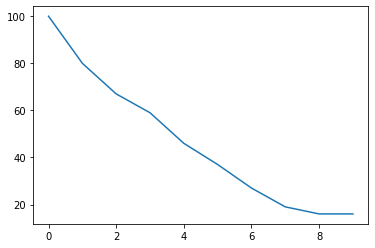

In [60]:
population.plot()

dodajemy reprodukcje

In [61]:
class Creature:
    p_death=0.2
    p_repr=0.2
    alive = True
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive
    def reproduce(self):
        if random.random() <= self.p_repr:
            return Creature()
        
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        self.specimen += new_creatures

problemem jest ze creature.reproduce zwraca czasami None i to nam bedzie zasmiecac liste kreatur wiec trzeba sie tego pozbyc (2 sposoby, trzeci to ciekawostka bo nie dziala)

nr.1 korzystamy z komend do setow(zbiorow) czyli jak pojawi sie z zbiorze none to je usuwamy

In [62]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures.remove(None)
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

nr.2 analogiczne tylko ze to jednoczesnie pokrywa przypadek gdy cala lista creature jest None bo wszyscy umarli 

In [63]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures -= {None}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

nr.3 niedziałający

In [64]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={(newborn:= creature.reproduce()) for creature in self.specimen 
                       if creature.alive and (newborn is not None)}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

### ZABAWA NA ZBIORACH

In [65]:
x={1,2,3}
y={4,5,6}

In [66]:
x | y

{1, 2, 3, 4, 5, 6}

In [67]:
x |= y

In [68]:
x & y

{4, 5, 6}

In [69]:
x={1,2,3}
y={1, 4,5,6}

In [70]:
x | y

{1, 2, 3, 4, 5, 6}

In [71]:
x & y

{1}

### wracamy

In [72]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures -= {None}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

In [73]:
population=Population()

In [74]:
population.simulate(10)
population.count_alive()

49

In [75]:
population.history 

[100, 84, 78, 78, 68, 61, 63, 63, 59, 56]

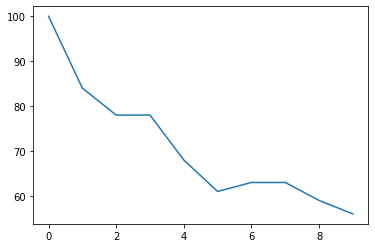

In [76]:
population.plot()

# ZAJECIA 4

In [77]:
import random
import matplotlib.pyplot as plt
class Creature:
    p_death=0.2
    p_repr=0.25
    alive = True
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive
    def reproduce(self):
        if random.random() <= self.p_repr:
            return Creature()

In [78]:
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot(self):
        plt.plot(self.history)     
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures -= {None}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

In [79]:
population=Population()

In [80]:
population.simulate(100)
population.count_alive()

119

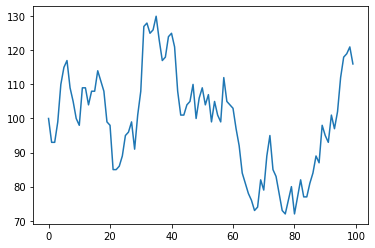

In [81]:
population.plot()

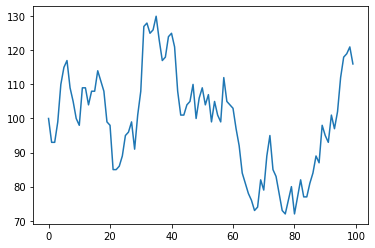

In [82]:
population.plot()

robimy tak ze potomek dziedziczy p_death i repr ale z lekkim zaburzeniem \
statyczne atrybuty jak alive zazwczyaj powinny byc w inicie

In [83]:
class Creature:
    alive = True
    
    def __init__(self,p_death=0.2, p_repr=0.25):
        self.p_death=p_death
        self.p_repr=p_repr
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive
    def reproduce(self):
        if random.random() <= self.p_repr:
            return Creature(self.p_death + random.normalvariate(mu=0, sigma=0.01), 
                            self.p_repr + random.normalvariate(mu=0, sigma=0.01))
    @property #deklarator bo p_death jest getterem dla atrybutu i nie chcemy by nadpisywal wartosc w inicie
    def p_death(self):
        return self._p_death
    
    @p_death.setter
    def p_death(self, value):
        self._p_death = min(1, max(0.0, value)) #ograniczenie ze p to maksymalnie 1
        if value < 0:
            self._p_death = 0.0
        else:
            self._p_death = value
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot_history(self):
        plt.plot(self.history)  
    def plot_attribute(self, attribute="p_death"):
        values=[getattr(creature, attribute) for creature in self.specimen if creature.alive]
        plt.hist(values) 
        plt.title(attribute)
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures -= {None}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

random.normalvariate - losujemy z rozkladu normalnego \
robimy dwa osobne ploty jeden zostaje taki sam, drugi to histogram z dowolnym atrbutyem (domyslnie p_death)

In [84]:
population=Population(10)

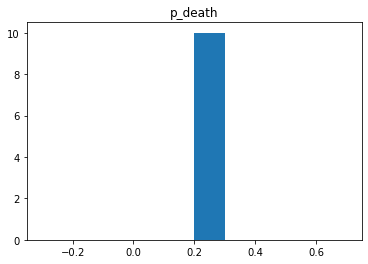

In [85]:
population.plot_attribute()

funckja getattr by  udalo sie odczytywac atrybut

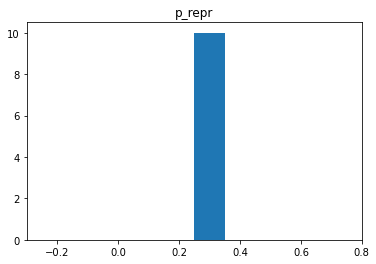

In [86]:
population.plot_attribute('p_repr')

In [87]:
population.simulate(100)
population.count_alive()

0

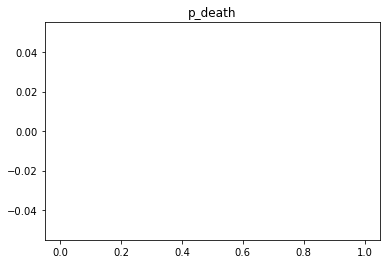

In [88]:
population.plot_attribute()

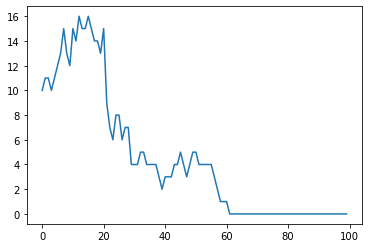

In [89]:
population.plot_history()

setter i getter dzialaja same z siebie bez wywolywania

In [90]:
s = Creature()

In [91]:
s.p_death

0.2

In [92]:
s.p_death = -1
s.p_death

0.0

alejest sztuczka by to ominac 

In [93]:
s._p_death = -1
s.p_death

-1

# ZAJECIA 5

teraz zajmiemy sie nowa klasa by sie przyjrec setterom i getterom 

In [94]:
class A:
    
    def __init__(self,x):
        self.x=x
    
    @property
    def x(self):
        print("uwu")
        return self._x #tu musi byc inaczej ta zmienna zapisana dlatego konwecja mowi o _ przed zmienna
    
    @x.setter #jak jest getter z property to musi tezbyc setter wywolujacy ta zmienna z _ przed
    def x(self, value):
        print("owo")
        self._x=value

In [95]:
obj=A(2)

owo


In [96]:
obj.x=4

owo


In [97]:
obj.x

uwu


4

In [98]:
class Probability:
    def __set_name__(self,owner,name): #name=p_death lub p_repr
        self.private_name = '_'+name
    def __get__(self, obj, objtype=None):
        return getattr(obj,self. private_name)
    def __set__(self, obj, value):
        setattr(obj, self.private_name, min(1, max(0.0, value)))
class Creature:
    alive = True
    p_death=Probability()
    p_repr=Probability()

In [99]:
import random
class Probability:
    def __set_name__(self,owner,name): #name=p_death lub p_repr
        self.private_name = '_'+name
    def __get__(self, obj, objtype=None):
        return getattr(obj,self. private_name)
    def __set__(self, obj, value):
        setattr(obj, self.private_name, min(1, max(0.0, value)))
        
class Creature:
    alive = True
    p_death=Probability()
    p_repr=Probability()
    def __init__(self,p_death=0.2, p_repr=0.25, p_escape=0.8):
        self.p_death=p_death
        self.p_repr=p_repr
        self.p_escape=p_escape
    def natural_selection(self):
        if random.random() <= self.p_death:
            self.alive = False
        return self.alive
    def reproduce(self):
        if random.random() <= self.p_repr:
            return type(self)()
    def escape(self):
        return True if random.random()<=self.p_escape else False
        
#     @property #deklarator bo p_death jest getterem dla atrybutu i nie chcemy by nadpisywal wartosc w inicie
#     def p_death(self):
#         return self._p_death
    
#     @p_death.setter
#     def p_death(self, value):
#         self._p_death = min(1, max(0.0, value)) #ograniczenie ze p to maksymalnie 1
#         if value < 0:
#             self._p_death = 0.0
#         else:
#             self._p_death = value
            
class Predator(Creature):
    p_death_if_fed=0.05
    p_death_if_hungry=0.5
    def __init__(self,p_death=0.5, p_repr=0.2):
        self.p_death=p_death
        self.p_repr=p_repr
    def hunt(self, victim):
        if not victim.escape():
            self.p_death=Predator.p_death_if_fed
            victim.alive = False
        else:
            self.p_death=Predator.p_death_if_hungry
    
    
    
class Population:
    def __init__(self, size=100):
        self.specimen = {Creature() for _ in range(size)}
        self.history=[]
    def count_alive(self):
        return len({creature for creature in self.specimen if creature.alive})
    def natural_selection(self):
        for creature in self.specimen:
            creature.natural_selection()
    def plot_history(self):
        plt.plot(self.history)  
    def plot_attribute(self, attribute="p_death"):
        values=[getattr(creature, attribute) for creature in self.specimen if creature.alive]
        plt.hist(values) 
        plt.title(attribute)
    def reproduce(self):
        new_creatures={creature.reproduce() for creature in self.specimen if creature.alive}
        new_creatures -= {None}
        self.specimen |= new_creatures
    def simulate(self, generations):
        for i in range(generations):
            self.history.append(self.count_alive())
            self.reproduce()
            self.natural_selection()

In [100]:
victim1=Creature()
predator1=Predator()

In [101]:
predator1.hunt(victim1)

In [102]:
victim1.alive

True

In [103]:
predator1.reproduce()